# EARTHQUAKE PREDICTION USING :

* #### LINEAR REGRESSION
* #### POLYNOMIAL REGRESSION
* #### SUPPORT VECTOR REGRESSION
* #### RANDOM FOREST REGRESSOR
* #### RANDOM FOREST TIME SERIES MODEL (RFTS)
* #### ANN (ARTIFICIAL NEURAL NETWORK)

In [1]:
 ! pip install basemap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
data = pd.read_csv("bronze.csv")
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [3]:
data.shape

(797046, 22)

In [4]:
data = data[['time', 'latitude', 'longitude', 'depth', 'mag']]  # Keeping relevant columns only
data.head(3)

,time,latitude,longitude,depth,mag
0,1930-12-08T08:01:02.000Z,23.261,120.277,15.0,6.3
1,1930-12-03T18:51:47.000Z,18.233,96.298,10.0,7.4
2,1930-12-02T07:01:30.000Z,25.854,98.356,35.0,6.2


In [5]:
data['time'] = pd.to_datetime(data['time'])  #Converting date into datetime format

In [6]:
data

,time,latitude,longitude,depth,mag
0,1930-12-08 08:01:02+00:00,23.2610,120.2770,15.00,6.3
1,1930-12-03 18:51:47+00:00,18.2330,96.2980,10.00,7.4
2,1930-12-02 07:01:30+00:00,25.8540,98.3560,35.00,6.2
3,1930-11-28 07:32:56+00:00,18.7790,-106.7670,15.00,6.3
4,1930-11-25 19:02:53+00:00,35.0500,139.1290,15.00,6.9
...,...,...,...,...,...
797041,2018-09-01 01:14:38.230000+00:00,-30.4830,-177.9279,43.90,4.3
797042,2018-09-01 01:07:59.120000+00:00,-10.7558,124.3621,10.00,4.0
797043,2018-09-01 01:00:13.810000+00:00,-5.5167,147.1735,217.56,4.6
797044,2018-09-01 00:27:11.440000+00:00,46.8819,155.6566,10.00,4.3


In [8]:
data = data[data['time'].dt.year >= 2000]   # Filtering out data before year 2000

Converting dates to Unix timestamps can be useful for various reasons when working with time-series data, including earthquake prediction regression models. Here are some reasons why converting dates to Unix timestamps might be beneficial:

* Numerical Representation: Machine learning models typically work with numerical data. Converting dates to Unix timestamps allows you to represent time as a numerical value that machine learning algorithms can process directly. This can simplify feature engineering and modeling.

* Temporal Patterns: Earthquake prediction models often need to capture temporal patterns and dependencies in the data. Unix timestamps encode the time information in a linear and continuous manner, making it easier for models to learn and understand the progression of time-related patterns.

* Feature Extraction: Converting dates to Unix timestamps can facilitate the extraction of meaningful features from time-series data. For example, you can calculate time differences between events, create lag features, or compute rolling statistics based on the timestamp values.

* Handling Irregular Time Intervals: Earthquake data might not be uniformly sampled at regular time intervals. Unix timestamps allow you to work with irregular time intervals more easily, as they provide a consistent representation of time regardless of gaps or variations in sampling frequency.


In [9]:
# Converting time to unix timestamp
import datetime
filtered_data = data
filtered_data['time'] = filtered_data['time'].apply(lambda x: int(x.timestamp())) # Converting time to unix time

C:\Users\asus\AppData\Local\Temp\ipykernel_14876\1112852722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time'] = filtered_data['time'].apply(lambda x: int(x.timestamp())) # Converting time to unix time


In [10]:
filtered_data

,time,latitude,longitude,depth,mag
322936,978306635,52.3170,160.5520,33.00,4.3
322937,978306179,-26.5470,-107.2610,10.00,5.4
322938,978301137,37.5470,-2.8010,6.00,2.8
322939,978300420,-38.5300,178.9300,91.00,4.0
322940,978299810,-38.0400,178.8000,33.00,5.3
...,...,...,...,...,...
797041,1535764478,-30.4830,-177.9279,43.90,4.3
797042,1535764079,-10.7558,124.3621,10.00,4.0
797043,1535763613,-5.5167,147.1735,217.56,4.6
797044,1535761631,46.8819,155.6566,10.00,4.3


<AxesSubplot:>

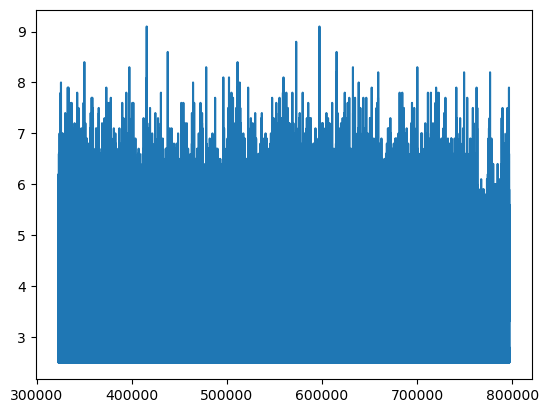

In [11]:
filtered_data['mag'].plot()

In [12]:
data = filtered_data
data.shape

(474110, 5)

In [13]:
# Finding duplicate entries and deleting them:

if data.isna().any().any():
    print('The dataframe contains NaN values.')
else:
    print('The dataframe does not contain any NaN values.')
    
missing_values_count = data.isnull().sum()
print("="*128)
print(missing_values_count)

data = data.dropna()

The dataframe does not contain any NaN values.
time         0
latitude     0
longitude    0
depth        0
mag          0
dtype: int64


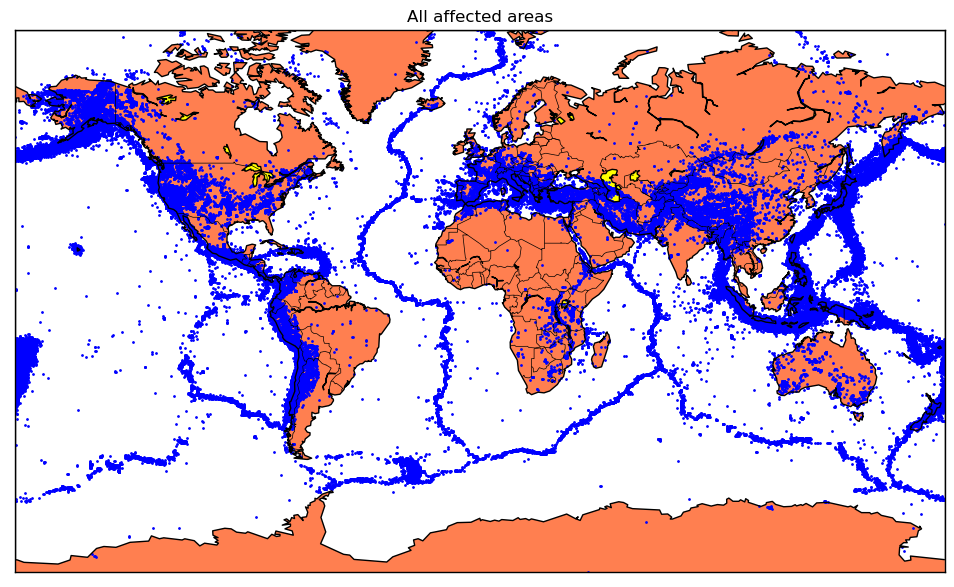

In [14]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 1, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='yellow')
m.drawmapboundary()
m.drawcountries()
plt.show()

# Considering only some part of the total data

In [15]:
# Considering Asia, Africa and Australia only

data = data[data['longitude']>-10]
data = data[data['longitude']< 160]
data = data[-40 < data['latitude']]
data = data[data['latitude']< 60]

In [16]:
data.shape

(183995, 5)

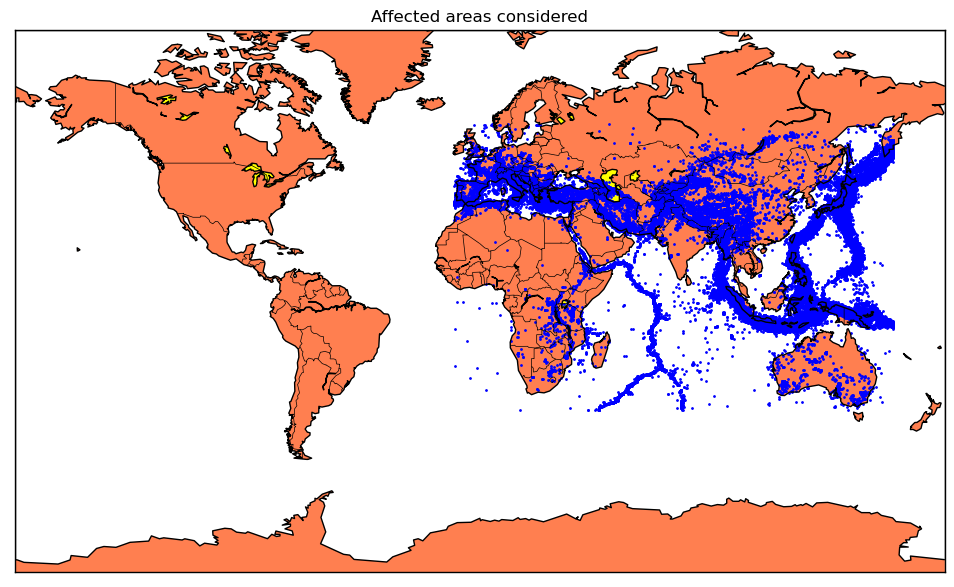

In [17]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("Affected areas considered")
m.plot(x, y, "o", markersize = 1, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='yellow')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [18]:
X = data.loc[:,['time', 'latitude', 'longitude', 'depth']]  # features
y = data.loc[:,['mag']]                                     # target variable
print(X.shape)
print(y.shape)

(183995, 4)
(183995, 1)


Text(0, 0.5, 'Magnitude')

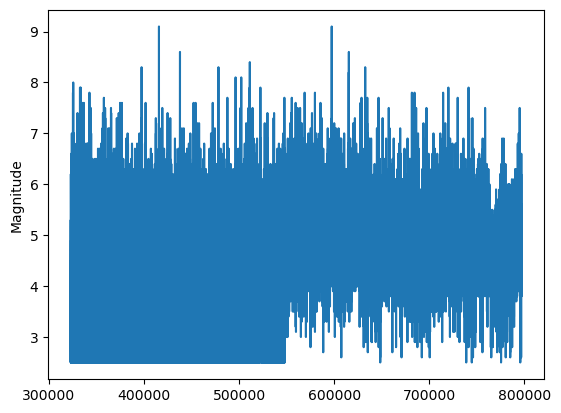

In [19]:
plt.plot(data['mag'])
plt.ylabel('Magnitude')

In [20]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(147196, 4) (36799, 4) (147196, 1) (36799, 1)


In [21]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 1.26252895,  1.726694  ,  0.39159199, -0.51328706],
       [ 0.51283936,  0.84176767,  0.95042398, -0.36389876],
       [-0.31271477,  0.89119701, -1.35534521, -0.30165363],
       ...,
       [ 0.61417354, -1.32318851,  0.19938184, -0.01034645],
       [ 1.15539418,  1.11015192, -1.48142408, -0.27663109],
       [ 0.42383438, -1.37427361,  0.61340546,  5.83820554]])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

## LINEAR REGRESSION

In [24]:
print(type(X_test_scaled))
X_test_scaled = pd.DataFrame(X_test_scaled)

<class 'numpy.ndarray'>


In [25]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
l_pred = lr.predict(X_test_scaled)
l_pred = pd.DataFrame(l_pred)
# l_df = pd.DataFrame({'Actual': y_test, 'Predicted': l_pred})
rmse_l_pred = sqrt(mean_squared_error(y_test, l_pred))


print("Linear Regression RMSE", rmse_l_pred)
lr_score = r2_score(y_test, l_pred)
print("Linear Regression r2 score ", lr_score)
dt_ms = mean_squared_error(y_test, l_pred)
print("Linear Regression  mean squared error ", dt_ms)
lr_m = mean_absolute_error(y_test, l_pred)
print("Linear Regression  mean absolute error ", lr_m)

Linear Regression RMSE 0.5237962803870483
Linear Regression r2 score  0.46825452813246415
Linear Regression  mean squared error  0.27436254334730725
Linear Regression  mean absolute error  0.4002724360012025


In [26]:
X_test_scaled.shape, l_pred.shape,y_test.shape
# type(y_test)

((36799, 4), (36799, 1), (36799, 1))

# VISUALZING RESULTS OF LINEAR REGRESSION

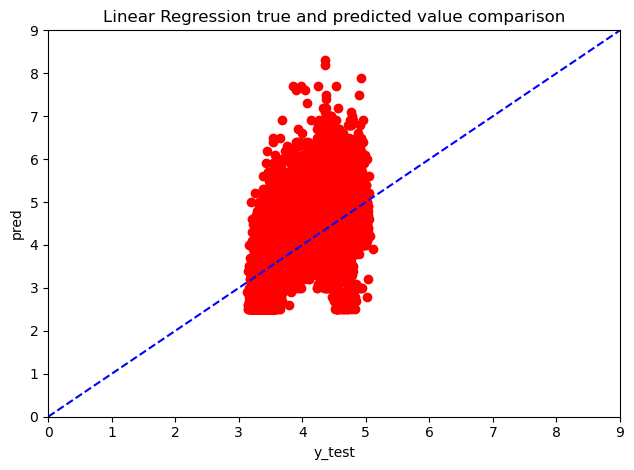

In [27]:
# Visualize Results
# Linear Regression
# plt.figure(figsize=(20, 115))
# plt.scatter(xplot,l_pred, color='b')
plt.show()
plt.scatter(l_pred,y_test , color='r')
# plt.plot([min(y_test), max(y_test)], [min(l_pred), max(y_test)], '--k')
plt.axis('tight')
plt.title("Linear Regression true and predicted value comparison")
plt.xlabel("y_test")
plt.ylabel("pred")
plt.tight_layout()
plt.xlim(0, 9)  # Set x-axis limits 
plt.ylim(0, 9)  # Set y-axis limits 
x1 = [0, 10]
y1 = [0, 10]
plt.plot(x1, y1, 'b--', label='45-degree line')
plt.show()

# POLYNOMIAL REGRESSION

In [28]:
X_train_scaled.shape

(147196, 4)

In [29]:
# Polynomial Regression
poly_reg = PolynomialFeatures(degree = 7)
x_poly = poly_reg.fit_transform(X_train_scaled)
lr2 = LinearRegression()
lr2.fit(x_poly, y_train)
poly_reg = lr2.predict(poly_reg.fit_transform(X_test_scaled))


### number of polynomial features = (7 + 4)!/(7! * 4!) = 330

In [30]:
x_poly.shape

(147196, 330)

In [31]:
# type(y_test)
# type(poly_reg)
poly_reg=pd.DataFrame(poly_reg)

In [32]:
rmse_p_reg = sqrt(mean_squared_error(y_test, poly_reg))
print("Polynomial Regression RMSE", rmse_p_reg)
pr_score = r2_score(y_test, poly_reg)
print("Polynomial Regression r2 score ", pr_score)
pr_ms = mean_squared_error(y_test, poly_reg)
print("Polynomial Regression  mean squared error ", pr_ms)
pr_m = mean_absolute_error(y_test, poly_reg)
print("Polynomial Regression  mean absolute error ", pr_m)

Polynomial Regression RMSE 0.44224224547758095
Polynomial Regression r2 score  0.6209474407960061
Polynomial Regression  mean squared error  0.19557820368505296
Polynomial Regression  mean absolute error  0.3242499882672558


####  *The polynomial degree of 7 is giving minimum RMSE and maximum R2 score amongst polynomial degress of 2,3,4,5,6,7,8,9*

## VISUALIZING 

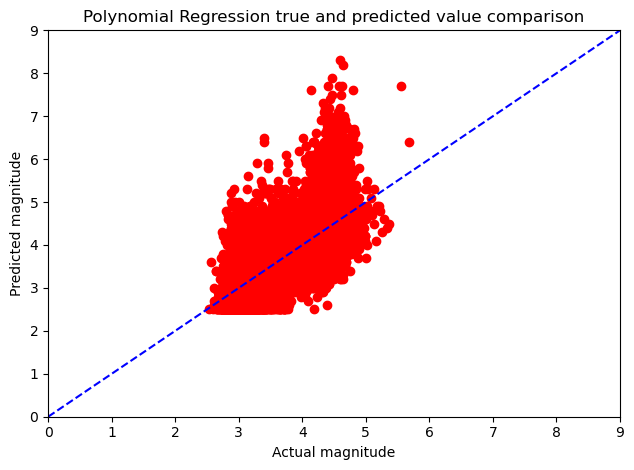

In [33]:
# Visualize Results
# POLYNOMIAL Regression
# plt.figure(figsize=(5, 10))
# plt.scatter(xplot,l_pred, color='b')
plt.show()
plt.scatter(poly_reg,y_test , color='r')
# plt.plot([min(y_test), max(y_test)], [min(l_pred), max(y_test)], '--k')
# plt.axis('tight')
plt.title("Polynomial Regression true and predicted value comparison")
plt.xlabel("Actual magnitude")
plt.ylabel("Predicted magnitude")
plt.tight_layout()
plt.xlim(0, 9)  # Set x-axis limits 
plt.ylim(0, 9)  # Set y-axis limits 
x1 = [0, 10]
y1 = [0, 10]
plt.plot(x1, y1, 'b--', label='45-degree line')

plt.show()

# SUPPORT VECTOR REGRESSION 

In [34]:
y_test.shape

(36799, 1)

The warning message typically occurs when you pass a column-vector y to a model or function that expects a 1-dimensional array. To resolve this warning, you can use the ravel() function to reshape the y variable into a 1-dimensional array.

In [35]:
y_train=y_train.values.ravel()
# y_train=y_train.flatten()
y_train.shape

(147196,)

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [37]:
#Create and train the SVM regression model
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train_scaled, y_train)

# Predict using the trained model
y_pred = svm_regressor.predict(X_test_scaled)

In [38]:
svr_pred = pd.DataFrame(y_pred)

In [39]:
rmse_svr_pred = sqrt(mean_squared_error(y_test, svr_pred))
print("Support Vector Regression RMSE", rmse_svr_pred)
svr_score = r2_score(y_test, svr_pred)
print("Support Vector Regression r2 score ", svr_score)
svr_ms = mean_squared_error(y_test, svr_pred)
print("Support Vector Regression  mean squared error ", svr_ms)
svr_m = mean_absolute_error(y_test, svr_pred)
print("Support Vector Regression  mean absolute error ", svr_m)

Support Vector Regression RMSE 0.4477449337345164
Support Vector Regression r2 score  0.611455879863749
Support Vector Regression  mean squared error  0.20047552568492646
Support Vector Regression  mean absolute error  0.32147758744305643


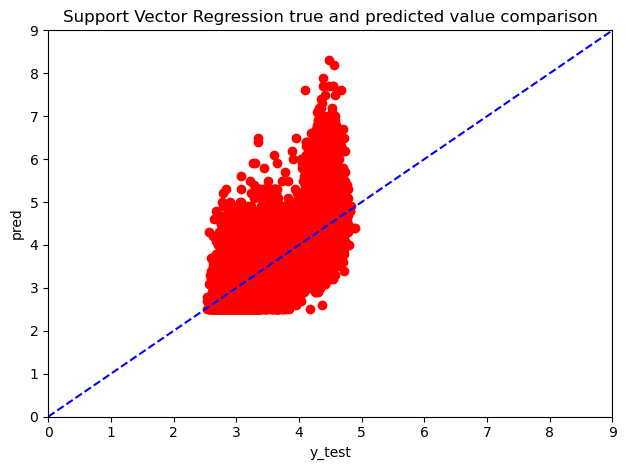

In [40]:
plt.show()
plt.scatter(svr_pred,y_test , color='r')
# plt.axis('tight')
plt.title("Support Vector Regression true and predicted value comparison")
plt.xlabel("y_test")
plt.ylabel("pred")
plt.tight_layout()
plt.xlim(0, 9)  # Set x-axis limits 
plt.ylim(0, 9)  # Set y-axis limits 
x1 = [0, 10]
y1 = [0, 10]
plt.plot(x1, y1, 'b--', label='45-degree line')

plt.show()

# RANDOM FOREST REGRESSOR

In [41]:
type(y_test)

pandas.core.frame.DataFrame

In [42]:
y_train = np.array(y_train)
y_train.shape

(147196,)

In [43]:
# Random Forest
# max depth versus error
md = 20
md_errors = np.zeros(md)

# random forest regression
for i in range(1, md + 1):
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=i, random_state=0)
    rf_reg.fit(X_train_scaled, y_train)
    r_pred = rf_reg.predict(X_test_scaled)
    

In [44]:
# finding errors

md_errors[i - 1] = sqrt(mean_squared_error(y_test, r_pred))
# r_df = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
print("Random Forest RMSE ", md_errors[i - 1])
rf_score = r2_score(y_test, r_pred)
print("Random Forest r2 score ", rf_score)
rf_ms = mean_squared_error(y_test, r_pred)
print("Random Forest mean squared error ", rf_ms)
rf_m = mean_absolute_error(y_test, r_pred)
print("Random Forest  mean absolute error ", rf_m)

Random Forest RMSE  0.41059107883158374
Random Forest r2 score  0.6732632400582137
Random Forest mean squared error  0.16858503401608382
Random Forest  mean absolute error  0.2977590610561763


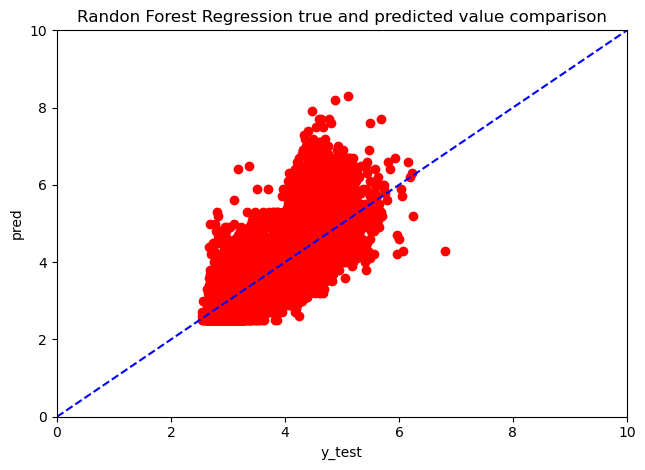

In [45]:
plt.show()
plt.scatter(r_pred,y_test , color='r')
# plt.axis('tight')
plt.title("Randon Forest Regression true and predicted value comparison")
plt.xlabel("y_test")
plt.ylabel("pred")
plt.tight_layout()
plt.xlim(0, 10)  # Set x-axis limits 
plt.ylim(0, 10)  # Set y-axis limits 
x1 = [0, 10]
y1 = [0, 10]
plt.plot(x1, y1, 'b--', label='45-degree line')

plt.show()

# ANN (Artificial Neural Networks)

In [52]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [53]:
# define the model
#Experimenting with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim= 4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae','mape'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2,epochs=30)

Epoch 1/30
3680/3680 [==============================] - 13s 2ms/step - loss: 0.3425 - mse: 0.3425 - mae: 0.3922 - mape: 9.5678 - val_loss: 0.2060 - val_mse: 0.2060 - val_mae: 0.3297 - val_mape: 7.9452
Epoch 2/30
3680/3680 [==============================] - 6s 2ms/step - loss: 0.2112 - mse: 0.2112 - mae: 0.3401 - mape: 8.3073 - val_loss: 0.2080 - val_mse: 0.2080 - val_mae: 0.3284 - val_mape: 7.8609
Epoch 3/30
3680/3680 [==============================] - 6s 2ms/step - loss: 0.2076 - mse: 0.2076 - mae: 0.3362 - mape: 8.2099 - val_loss: 0.1999 - val_mse: 0.1999 - val_mae: 0.3317 - val_mape: 8.1835
Epoch 4/30
3680/3680 [==============================] - 6s 2ms/step - loss: 0.2045 - mse: 0.2045 - mae: 0.3335 - mape: 8.1421 - val_loss: 0.2038 - val_mse: 0.2038 - val_mae: 0.3430 - val_mape: 8.4744
Epoch 5/30
3680/3680 [==============================] - 7s 2ms/step - loss: 0.2036 - mse: 0.2036 - mae: 0.3325 - mape: 8.1133 - val_loss: 0.2106 - val_mse: 0.2106 - val_mae: 0.3272 - val_mape: 7.7274

In [55]:
# from matplotlib import pyplot as plt
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [56]:
# acc = history.history['mae']
# val_acc = history.history['val_mae']
# plt.plot(epochs, acc, 'y', label='Training MAE')
# plt.plot(epochs, val_acc, 'r', label='Validation MAE')
# plt.title('Training and validation MAE')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [57]:
#Predict on test data

predictions = model.predict(X_test_scaled)
print("Predicted values are: \n", predictions)
print("Real values are: ", y_test)
y_test.shape

1150/1150 [==============================] - 4s 1ms/step
Predicted values are: 
 [[3.6409767]
 [3.3625166]
 [4.1034517]
 ...
 [4.4681115]
 [4.7567425]
 [4.6715117]]
Real values are:          mag
482382  3.5
362253  3.2
348913  4.3
740902  4.8
796846  4.7
...     ...
323621  3.7
739260  4.5
540581  4.4
565523  4.3
395932  6.4

[36799 rows x 1 columns]


(36799, 1)

In [60]:
# finding errors

rmse_ANN_pred = sqrt(mean_squared_error(y_test, predictions))
print("ANN RMSE", rmse_ANN_pred)
ann_score = r2_score(y_test, predictions)
print("ANN r2 score ", ann_score)
ann_ms = mean_squared_error(y_test, predictions)
print("ANN mean squared error ", ann_ms)
ann_m = mean_absolute_error(y_test, predictions)
print("ANN mean absolute error ", ann_m)

ANN RMSE 0.43962449824636046
ANN r2 score  0.6254215816694377
ANN mean squared error  0.19326969945836417
ANN mean absolute error  0.328766719719428


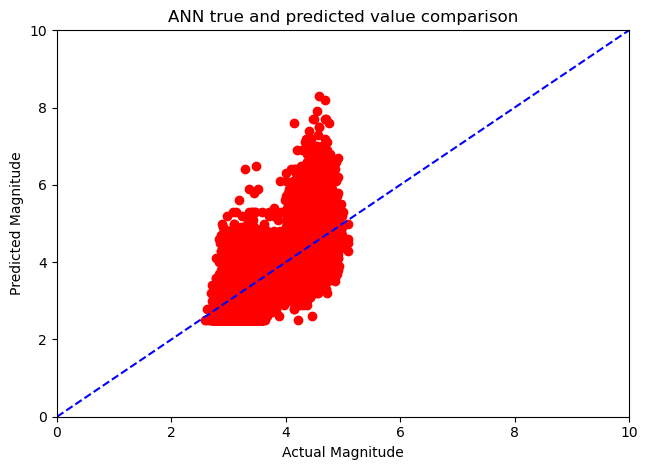

In [59]:
# Visualize Results
# ANN
# plt.figure(figsize=(5, 10))
# plt.scatter(xplot,l_pred, color='b')
plt.show()
plt.scatter(predictions,y_test , color='r')
# plt.axis('tight')
plt.title("ANN true and predicted value comparison")
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.tight_layout()
plt.xlim(0, 10)  # Set x-axis limits 
plt.ylim(0, 10)  # Set y-axis limits 
x1 = [0, 10]
y1 = [0, 10]
plt.plot(x1, y1, 'b--', label='45-degree line')


# Inference:
## We can see that the best model to predict earthquakes was Random Forest Regressor with accuray metric as shown below:
* ### Random Forest RMSE  0.4105933156264207
* ### Random Forest r2 score  0.6732596800924664